In [17]:
!pip install spacy networkx

In [1]:
import spacy
import networkx as nx
from spacy.tokens import Doc

In [36]:
!pip install matplotlib

In [30]:
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Input text
text = """
Albert Einstein was a theoretical physicist. He developed the theory of relativity,
which is one of the two pillars of modern physics. Einstein was born in Ulm, Germany.
He received the Nobel Prize in Physics in 1921. He is famous for the equation E=mc^2.
"""

# Process the text with spaCy
doc = nlp(text)

# Create a NetworkX graph
graph = nx.Graph()

# Iterate through named entities and add nodes to the graph
entities = [entity.text for entity in doc.ents]
for entity in entities:
    graph.add_node(entity)

# Iterate through sentences and add edges to the graph
for sent in doc.sents:
    for token in sent:
        if token.dep_ == "nsubj":
            subject = token.text
        if token.dep_ == "pobj":
            obj = token.text
            graph.add_edge(subject, obj)


In [31]:
# Print nodes
print("Nodes:", graph.nodes())

# Print edges
print("Edges:", graph.edges())

Nodes: ['Albert Einstein', 'two', 'Ulm', 'Germany', 'the Nobel Prize in Physics', '1921', 'He', 'relativity', 'which', 'pillars', 'physics', 'Physics', 'equation']
Edges: [('Ulm', 'which'), ('1921', 'He'), ('He', 'relativity'), ('He', 'Physics'), ('He', 'equation'), ('which', 'pillars'), ('which', 'physics')]


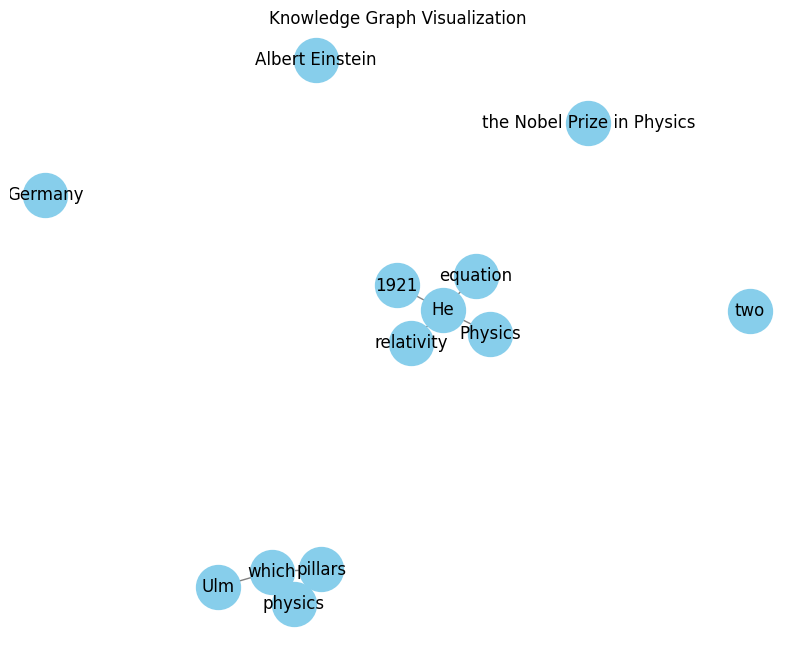

In [32]:
# Visualize the graph
pos = nx.spring_layout(graph, seed=42)
plt.figure(figsize=(10, 8))  # Adjust figure size

nx.draw_networkx_nodes(graph, pos, node_color="skyblue", node_size=1000)
nx.draw_networkx_edges(graph, pos, edge_color="gray")
nx.draw_networkx_labels(graph, pos)

plt.title("Knowledge Graph Visualization")
plt.axis("off")
plt.show()